<a href="https://colab.research.google.com/github/Gautami-2607/Data-Analytics-/blob/main/End_to_End_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Titanic
## Logistic Regression with Python


For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous dataset.


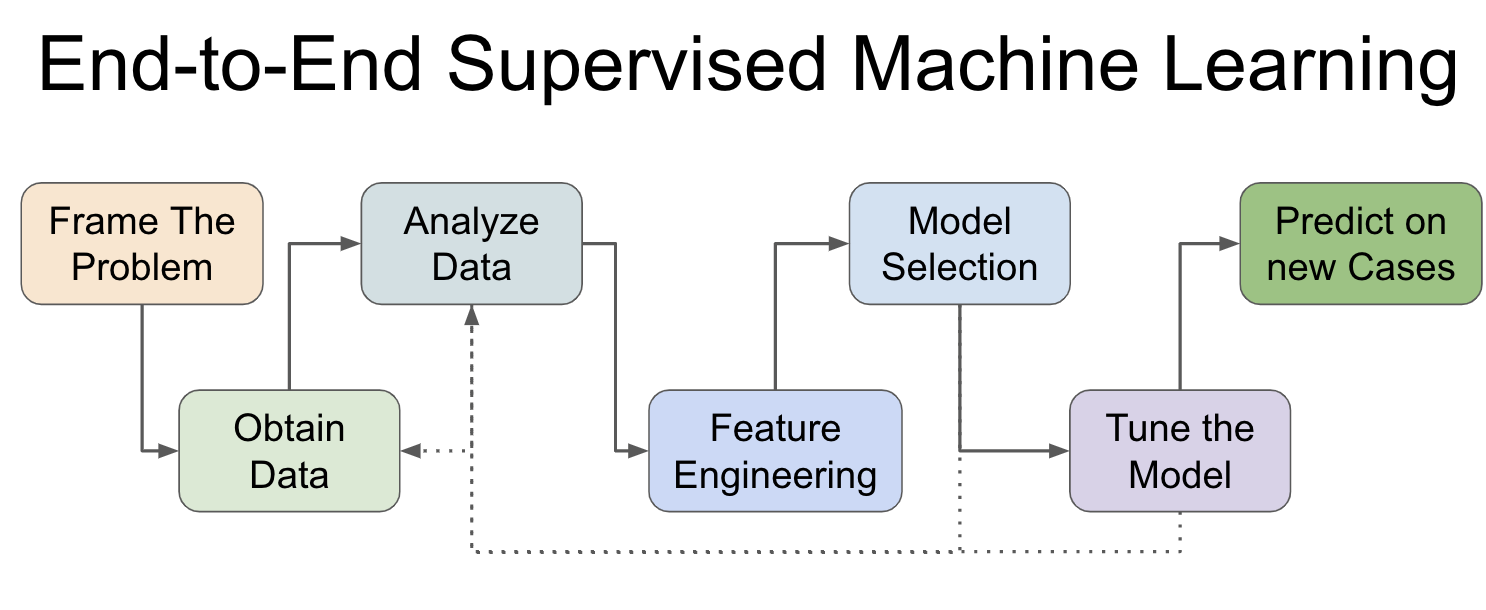

# Step - 1 : Frame The Problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.



# Step - 2 : Obtain the Data

## Import Libraries

In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [ ]:
!ls -al

Pandas provides two important data types with in built functions to be able to provide extensive capability to handle the data.The datatypes include Series and DataFrames.

Pandas provides ways to read or get the data from various sources like read_csv,read_excel,read_html etc.The data is read and stored in the form of DataFrames.

In [ ]:
!wget https://www.dropbox.com/s/8grgwn4b6y25frw/titanic.csv

In [ ]:
!ls -l

In [ ]:
data = pd.read_csv('titanic.csv')

In [ ]:
data.head(10)

In [ ]:
#to get the last 5 entries of the data
data.tail()

In [ ]:
type(data)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
a = data['Age']

In [ ]:
a

In [ ]:
type(a)

In [ ]:
type(data)

In [ ]:
data.info()

In [ ]:
data.describe()

## Accessing individual data in the data frame

### Working with Columns

since each dataframe is a collection of series if we access a single column we get a series object

In [ ]:
data['Embarked'].value_counts()

In [ ]:
y = data[['Cabin','Parch', 'Age']].head()

In [ ]:
type(y)

In [ ]:
y.head(3)

In [ ]:
data.info() #New_parch is added to the set of columns in the data frames

# Step - 3 : Analyse the Data

In [ ]:
data['Sex'].value_counts()


In [ ]:
data['Sex']=='female'

In [ ]:
data[data['Sex']=='female']



In [ ]:
ms.matrix(data)

In [ ]:
data.info()

We can observe that there are missing values in 'Age', 'Cabin' and 'Embarked'. Let's continue.

In [ ]:
data.info()

Visualization of data with Seaborn

In [ ]:
sns.jointplot(x='Fare',y='Age',data=data)

In [ ]:
sns.distplot(data['Fare'])

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

In [ ]:
sns.swarmplot
sns.swarmplot(x='Pclass',y='Age',data=data,palette='Set2')

In [ ]:
 sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = data,palette='rainbow')

In [ ]:
data['Age'].hist(bins = 30, color = 'darkred', alpha = 0.8)

In [ ]:
sns.countplot(x = 'SibSp', data = data)

In [ ]:
data['Fare'].hist(color = 'green', bins = 40, figsize = (8,3))

#### What do you observe from the above charts?

# Step - 4 : Feature Engineering

## Feature Engineering

We want to fill the missing values of the age in the dataset with the average age value for each of the classes. This is called data imputation.

In [ ]:
data.info()

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [ ]:
data['Cabin'].value_counts()

The average age for each of the classes are estimated to be as follows:
  
  * For **Class 1** - The median age is 37
  * For **Class 2** - The median age is 29
  * For **Class 3** - The median age is 24
  
Let's impute these values into the age column.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        # Class-1
        if Pclass == 1:
            return 37
        # Class-2 
        elif Pclass == 2:
            return 29
        # Class-3
        else:
            return 24

    else:
        return Age

Applying the function.

In [ ]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
data['Cabin'].value_counts()

Now let's visualize the missing values.

In [ ]:
ms.matrix(data)

The Age column is imputed sucessfully.

Let's drop the Cabin column and the row in the Embarked that is NaN.

In [ ]:
data.drop('Cabin', axis = 1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.dropna(inplace = True)

In [ ]:
ms.matrix(data)

In [ ]:
data.info()

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
data['Sex'].value_counts()

In [ ]:
data['Embarked'].value_counts()

In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
embark.head()


In [ ]:
sex.head()

In [ ]:
old_data = data.copy()
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()



In [ ]:
#data.drop(['PassengerId'],axis=1,inplace=True)

#data.info()

In [ ]:
data = pd.concat([data,sex,embark],axis=1)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

# Step - 5 : Model Selection

## Building a Logistic Regression model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.3, 
                                                    random_state=42)

In [ ]:
len(y_test)

In [ ]:
len(y_test)/len(data)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
logmodel.coef_

In [ ]:
logmodel.intercept_

In [ ]:
predict =  logmodel.predict(X_test)
predict[:5]

In [ ]:
y_test[:5]

Let's move on to evaluate our model.

# Step - 6 : Evaluation

## Evaluation

We can check precision, recall, f1 - score using classification report!

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

## Confusion Matrix

True positive   |	False positive,  
________________|________________  
                |                  
False negative  |	True negative    

In [ ]:
print(confusion_matrix(y_test, predict))

#### Precision Score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
print(precision_score(y_test,predict))

#### Recall score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
print(recall_score(y_test,predict))

#### f1_score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
                F1 = 2 \* (precision \* recall) / (precision + recall)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f1_score(y_test,predict))

To get all the above metrics at one go, use the following function:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

# Step - 7 : Predict on New Cases

## Prediction on Test Data From Kaggle

create an account on www.kaggle.com

In [ ]:
!wget https://www.dropbox.com/s/6hyaidkuyfsv45u/production.csv
prod_data=pd.read_csv('production.csv')

In [ ]:
prod_data.info()

In [ ]:
prod_data.head()


In [ ]:
ms.matrix(prod_data)

### Data Cleaning

There are inconsistencies in test data.We can use the same graph functions that are used to visualize the train data for test data as well.We use the same data cleaning techniques like removing the cabin column and applying impute_age function on age column on test data.  
But we cannot remove any rows because kaggle wants same number of rows in submission csv also. So we fill the missing values in fare with mean.

In [ ]:
prod_data['Age'] = prod_data[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
ms.matrix(prod_data)

In [ ]:
prod_data.drop('Cabin', axis = 1, inplace= True)

In [ ]:
ms.matrix(prod_data)

In [ ]:
prod_data.fillna(prod_data['Fare'].mean(),inplace=True)

In [ ]:
prod_data.info()

In [ ]:
ms.matrix(prod_data)

In [ ]:
sex = pd.get_dummies(prod_data['Sex'], drop_first=True)
embark = pd.get_dummies(prod_data['Embarked'], drop_first=True)

prod_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

prod_data = pd.concat([prod_data,sex,embark],axis=1)

In [ ]:
prod_data.head()

In [ ]:
predict1=logmodel.predict(prod_data)

In [ ]:
predict1

In [ ]:
df1=pd.DataFrame(predict1,columns=['Survived'])

In [ ]:
df2=pd.DataFrame(prod_data['PassengerId'],columns=['PassengerId'])

In [ ]:
df2.head()

In [ ]:
result = pd.concat([df2,df1],axis=1)
result.head()

In [ ]:
result.to_csv('result.csv',index=False)

In [ ]:
from google.colab import files
files.download('result.csv') 

In [ ]:
!ls -l

Submit the file to https://www.kaggle.com/c/titanic

---
                                                     THE END